<a href="https://colab.research.google.com/github/jrchac/Thesis-Project-Feele/blob/main/G2020_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Garage 2020 Business Case

In [ ]:
%run G2020_Cleaning_Data.ipynb   # this is were our functions are stored

data = cleaning() #it takes long to execute (4min30s)

## Problem Description

**Problem description:**
Young people are showing increasing stress-related complaints. Due to the unattractiveness of traditional mental health care, there is a real gap in accessible and personalized mental health support for this group of people. Through smart-cueing, Feelee is looking to offer adaptive advice and interventions. As of today, 4000 young people have downloaded and used the app.

**Goals:**
- Find patterns in the users of FeeLee (EDA)
- Develop a model that can provide user profiles (ML / clustering analysis)


**Description of Dataset**:
1. question_1: How are you feeling? (Good, Okay, Not Okay)
2. question_2: How are you feeling? (Further specification of Good, okay and not okay)
3. question_3: What makes you feel X? (X = the completed answer to question 2)
4. question_4: What are you doing?
5. question_5: And who are you with?

6. X00.01: Indicates the number of steps taken between 00.00 and 01.00

7. X01.02 indicates the number of steps taken between 01:00 and 02:00
and so on

## Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file = 'Garage2020_dataset.xlsx'

df = pd.read_excel(file)
df.head()

,user_id,gender,birthday,os,Date,Time,DateTime,question_1,question_2,question_3,...,X14.15,X15.16,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.00
0,2527,she,1995.0,ios,2022-04-12,14:40:20,2022-04-12 14:40:20,Niet oke,Ontevreden,Ziek,...,NaN,NaN,142.0,62.0,1108.0,21.0,NaN,NaN,NaN,NaN
1,2527,she,1995.0,ios,2022-04-13,14:56:58,2022-04-13 14:56:58,Oke,Verrast,NaN,...,NaN,94.0,NaN,2533.0,16.0,1016.0,NaN,NaN,NaN,NaN
2,2527,she,1995.0,ios,2022-04-13,14:36:44,2022-04-13 14:36:44,Oke,Verrast,Oke nacht,...,NaN,94.0,NaN,2533.0,16.0,1016.0,NaN,NaN,NaN,NaN
3,2527,she,1995.0,ios,2022-04-14,08:00:41,2022-04-14 08:00:41,Goed,Vreugdevol,NaN,...,165.0,107.0,70.0,152.0,555.0,60.0,576.0,NaN,NaN,692.0
4,2527,she,1995.0,ios,2022-04-20,12:06:25,2022-04-20 12:06:25,Niet oke,Nerveus,Stress,...,NaN,27.0,153.0,2484.0,NaN,1043.0,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('user_id')['Date']

### General Data Exploration


In [ ]:
print(len(df))
df.columns

59299


Index(['user_id', 'gender', 'birthday', 'os', 'Date', 'Time', 'DateTime',
       'question_1', 'question_2', 'question_3', 'question_4', 'question_5',
       'X00.01', 'X01.02', 'X02.03', 'X03.04', 'X04.05', 'X05.06', 'X06.07',
       'X07.08', 'X08.09', 'X09.10', 'X10.11', 'X11.12', 'X12.13', 'X13.14',
       'X14.15', 'X15.16', 'X16.17', 'X17.18', 'X18.19', 'X19.20', 'X20.21',
       'X21.22', 'X22.23', 'X23.00'],
      dtype='object')

In [ ]:
cols = ['user_id', 'gender', 'birthday', 'os', 'Date', 'Time', 'DateTime',
       'question_1', 'question_2', 'question_3', 'question_4', 'question_5']
df[cols].nunique()

user_id        2626
gender            4
birthday         72
os                2
Date            676
Time          33585
DateTime      58675
question_1        9
question_2       28
question_3       28
question_4       12
question_5       11
dtype: int64

In [ ]:
print(df.duplicated().sum())
# duplicate are probably an error, so we remove them
df = df.drop_duplicates()

6


In [ ]:
# df.isna().sum() #count of nan's
(df.isna().sum()/len(df))*100 #percentage of nan per column

user_id        0.000000
gender         0.003373
birthday       0.003373
os            56.441738
Date           0.000000
Time           0.003373
DateTime       0.003373
question_1     0.026985
question_2     0.042163
question_3     3.292126
question_4     3.777849
question_5     4.057815
X00.01        89.907746
X01.02        94.744742
X02.03        97.072167
X03.04        98.003137
X04.05        98.547889
X05.06        98.220701
X06.07        94.990977
X07.08        88.023881
X08.09        81.309767
X09.10        78.781644
X10.11        75.646366
X11.12        74.787918
X12.13        71.441823
X13.14        72.455433
X14.15        72.990066
X15.16        73.050782
X16.17        73.062587
X17.18        72.296898
X18.19        72.293525
X19.20        73.696726
X20.21        75.470966
X21.22        76.454219
X22.23        78.218339
X23.00        84.413000
dtype: float64

### Number of Entries Per User


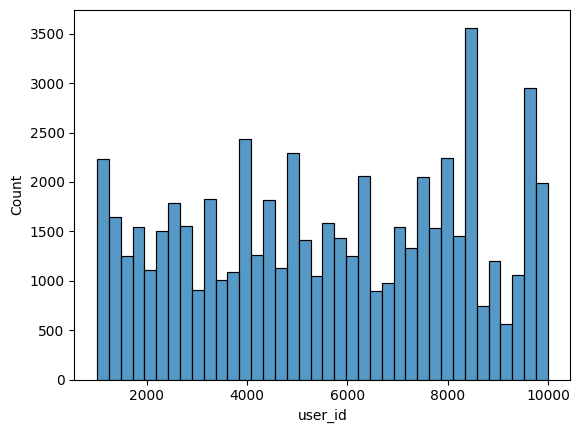

In [ ]:
sns.histplot(df['user_id'])
plt.show()

In [ ]:
num_entries_user = df['user_id'].value_counts()
print(num_entries_user)
print(num_entries_user.sum(axis=0))

user_id
3973    1618
8400    1328
9654     814
9776     729
1072     648
        ... 
8846       1
4337       1
2433       1
8499       1
3902       1
Name: count, Length: 2626, dtype: int64
59293


In [ ]:
(df[df["user_id"]==3973]['Date'])

13566   2022-06-11
13567   2022-06-11
13568   2022-06-12
13569   2022-06-12
13570   2022-06-12
           ...    
15179   2024-02-26
15180   2024-02-27
15181   2024-02-27
15182   2024-02-28
15183   2024-02-28
Name: Date, Length: 1618, dtype: datetime64[ns]

### New df: only users with more than 7 data points


In [ ]:
print(len(num_entries_user))
#print((num_entries_user > 6).sum())
print((num_entries_user <= 7).sum()) # number of user with at least 7 days of input
idx = (num_entries_user <= 7).sum()-1

# we create a list of id that have more than 7 entries
user_id_entries7 = list(num_entries_user.iloc[:-idx].keys())

2626
1515


**IMPORTANT**: from now on the variable df contain only users with more than 7 entries

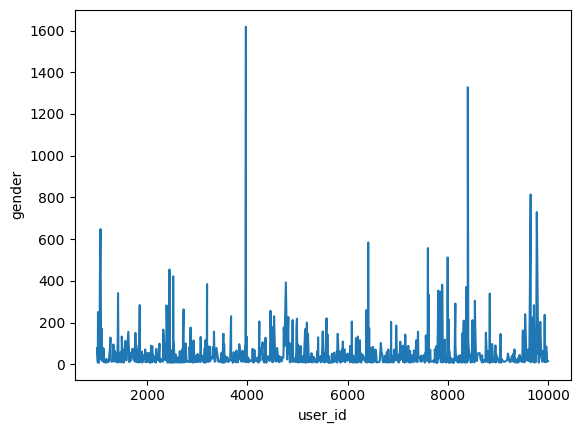

In [ ]:
# we create a new df with only users that have more than 7 entries
df = df[df["user_id"].isin(user_id_entries7)]
#we plot the number of entries per user
sns.lineplot(df.groupby('user_id')['gender'].count())
plt.show()

## Data Cleaning / Feature Engineering

### Translation to English

In [ ]:
# Cell created by ChatGPT
# After failed attemps to translate the df to English, I decide to go with ChatGPT's brute approach
# Can be deleted at the end and return to original dataset.
translation_dict = {
    'Niet oke': 'Not okay',
    'Oke': 'Okay',
    'Goed': 'Good',
    'Omgeving': 'Environment',
    'Leuke taak': 'Fun task',
    'Weet ik niet': 'I don\'t know',
    'Goede nacht': 'Good night',
    'Gesprek': 'Conversation',
    'Vakantie': 'Vacation',
    'Ontevreden': 'Dissatisfied',
    'Verrast': 'Surprised',
    'Vreugdevol': 'Joyful',
    'Nerveus': 'Nervous',
    'Kalm': 'Calm',
    'Blij': 'Happy',
    'Moe': 'Tired',
    'Angstig': 'Anxious',
    'Energiek': 'Energetic',
    'Verveeld': 'Bored',
    'Melig': 'Giggly',
    'Trots': 'Proud',
    'Boos': 'Angry',
    'Gefrustreerd': 'Frustrated',
    'Onverschillig': 'Indifferent',
    'Geliefd': 'Loved',
    'Feestelijk': 'Festive',
    'Verward': 'Confused',
    'Tevreden': 'Satisfied',
    'Geirriteerd': 'Irritated',
    'Geinteresseerd': 'Interested',
    'Somber': 'Gloomy',
    'Opgelaten': 'Embarrassed',
    'Verliefd': 'In love',
    'Teleurgesteld': 'Disappointed',
    'Bezorgd': 'Worried',
    'Verdrietig': 'Sad',
    'Bewondering': 'Admiration',
    'Ziek': 'Sick',
    'Oke nacht': 'Okay night',
    'Stress': 'Stress',
    'Sporten': 'Sports',
    'Compliment': 'Compliment',
    'Slecht nieuws': 'Bad news',
    'Selfcare': 'Self-care',
    'Rust': 'Rest',
    'Goed nieuws': 'Good news',
    'Eenzaam': 'Lonely',
    'Feest': 'Party',
    'Iets anders': 'Something else',
    'Matig nieuws': 'Moderate news',
    'Matige taak': 'Moderate task',
    'Iemand ontmoet': 'Met someone',
    'Agenda': 'Agenda',
    'Slechte nacht': 'Bad night',
    'Nieuwe relatie': 'New relationship',
    'Volle agenda': 'Busy schedule',
    'Ruzie': 'Argument',
    'Stomme taak': 'Stupid task',
    'Verrassing': 'Surprise',
    'Werken': 'Work',
    'Relaxen': 'Relaxing',
    'Eten/drinken': 'Eating/drinking',
    'Niets': 'Nothing',
    'Huiswerk': 'Homework',
    'Buiten zijn': 'Being outdoors',
    'Gamen': 'Gaming',
    'Visite/bezoek': 'Visiting',
    'Televisie': 'Television',
    'Klasgenoten': 'Classmates',
    'Alleen': 'Alone',
    'Relatie': 'Relationship',
    'Vrienden': 'Friends',
    'Collega’s': 'Colleagues',
    'Huisgenoten': 'Housemates',
    'Familie': 'Family',
    'Iemand anders': 'Someone else',
    'Gezin': 'Family',
    'Huisdieren': 'Pets',
    'Zeg ik niet': 'I won\'t say'
}

In [ ]:
# Apply translation to each column
df['question_1'] = df['question_1'].map(translation_dict)
df['question_2'] = df['question_2'].map(translation_dict)
df['question_3'] = df['question_3'].map(translation_dict)
df['question_4'] = df['question_4'].map(translation_dict)
df['question_5'] = df['question_5'].map(translation_dict)

# Check unique values after translation
print(df['question_1'].unique())
print(df['question_2'].unique())
print(df['question_3'].unique())
print(df['question_4'].unique())
print(df['question_5'].unique())

['Not okay' 'Okay' 'Good' 'Environment' nan 'Fun task' "I don't know"
 'Good night' 'Conversation']
['Dissatisfied' 'Surprised' 'Joyful' 'Nervous' 'Calm' 'Happy' 'Tired'
 'Anxious' 'Energetic' 'Bored' 'Giggly' 'Proud' 'Angry' 'Frustrated'
 'Festive' 'Satisfied' 'Confused' 'Irritated' 'Interested' 'Gloomy'
 'Embarrassed' 'Indifferent' 'In love' 'Loved' nan 'Disappointed'
 'Worried' 'Sad' 'Admiration']
['Sick' nan 'Okay night' 'Stress' 'Sports' 'Compliment' 'Fun task'
 'Bad news' 'Self-care' 'Rest' 'Good news' 'Good night' 'Lonely' 'Party'
 'Something else' 'Moderate task' 'Conversation' 'Met someone'
 'Moderate news' 'Agenda' "I don't know" 'Vacation' 'Bad night'
 'Environment' 'New relationship' 'Busy schedule' 'Argument' 'Stupid task'
 'Surprise']
['Something else' nan 'Work' 'Relaxing' 'Eating/drinking' 'Nothing'
 'Homework' 'Being outdoors' 'Gaming' 'Sports' 'Television' 'Visiting'
 "I don't know"]
['Classmates' nan 'Alone' 'Relationship' 'Friends' 'Colleagues'
 'Housemates' 'Family

### Demographic Data

In [ ]:
dem_col = ['user_id', 'gender', 'birthday', 'os']
df[dem_col].isna().sum()

user_id         0
gender          2
birthday        2
os          30518
dtype: int64

What we do with these na values:
- os: we can delete column/ not relevant for the project
- birthday and gender: we investigate further

In [ ]:
# deleting column 'os'
df = df.drop(columns=['os'])

In [ ]:
df[df['birthday'].isna()]

,user_id,gender,birthday,Date,Time,DateTime,question_1,question_2,question_3,question_4,...,X14.15,X15.16,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.00
38043,6507,NaN,NaN,2022-12-30,NaN,NaT,NaN,NaN,NaN,NaN,...,2814.0,NaN,NaN,1077.0,365.0,45.0,NaN,NaN,8.0,NaN
54391,3198,NaN,NaN,2023-10-23,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Neither of these rows add any value to the analysis, so we delete them from the df.

In [ ]:
nan_birthday_index = df[df['birthday'].isna()].index

# Drop rows with NaN values in the 'birthday' column
df.drop(index=nan_birthday_index, inplace=True)

In [ ]:
df[['user_id', 'gender', 'birthday']].isna().sum()

user_id     0
gender      0
birthday    0
dtype: int64

Now we one-hot-encode the gender column

In [ ]:
# concatenate our df with these new one-hot-encoded df
# df_encoded = pd.get_dummies(df, columns=['gender'])
# pd.concat([df,df_encoded], axis=1)

### Physical Activity Data


First, we convert nan values into 0, so we can use these columns.

In [ ]:
activity =  ['X00.01', 'X01.02', 'X02.03', 'X03.04', 'X04.05', 'X05.06', 'X06.07',
                  'X07.08', 'X08.09', 'X09.10', 'X10.11', 'X11.12', 'X12.13', 'X13.14',
                  'X14.15', 'X15.16', 'X16.17', 'X17.18', 'X18.19', 'X19.20', 'X20.21',
                  'X21.22', 'X22.23', 'X23.00']

df[activity] = df[activity].fillna(0)

Creating a column with daily activity (the sum of all steps in a day)

In [ ]:
df['daily_activity']=df[activity].sum(axis=1)
df['daily_activity'].describe()

count    55031.000000
mean      2119.653868
std       3875.527864
min          0.000000
25%          0.000000
50%          0.000000
75%       3132.000000
max      48792.000000
Name: daily_activity, dtype: float64

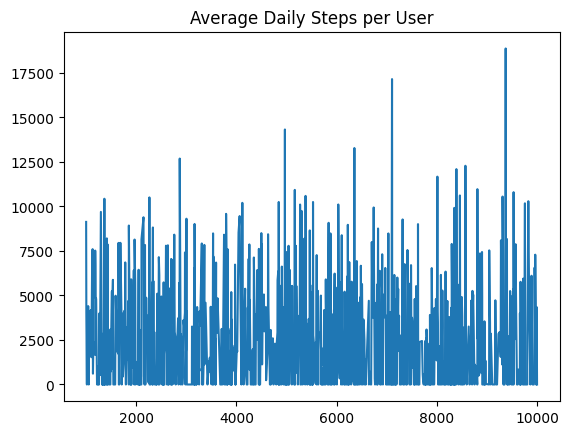

In [ ]:
# we plot the mean number of steps per user
plt.plot(df.groupby(['user_id'])['daily_activity'].mean())
plt.title('Average Daily Steps per User')
plt.show()

### Question- Columns

Dealing with null values

In [ ]:
questions = ['user_id','Date', 'Time', 'DateTime', 'question_1',
       'question_2', 'question_3', 'question_4', 'question_5']

print(df[questions].isna().sum().sum()) # total number of nan
df[questions].isna().sum()

5822


user_id          0
Date             0
Time             0
DateTime         0
question_1       7
question_2      13
question_3    1756
question_4    1959
question_5    2087
dtype: int64

In [ ]:
q =['question_1', 'question_2', 'question_3', 'question_4', 'question_5']

df[q]

,question_1,question_2,question_3,question_4,question_5
0,Not okay,Dissatisfied,Sick,Something else,Classmates
1,Okay,Surprised,NaN,NaN,NaN
2,Okay,Surprised,Okay night,Work,Classmates
3,Good,Joyful,NaN,NaN,NaN
4,Not okay,Nervous,Stress,Work,Alone
...,...,...,...,...,...
59252,Not okay,Frustrated,Something else,Something else,Classmates
59253,Not okay,Worried,Sick,Nothing,Alone
59254,Not okay,Sad,Lonely,Homework,Classmates
59268,Okay,Confused,Agenda,Work,Alone


#### Question 1

Because Question 1 is very important, we can delete observations that do not contain an answer.

In [ ]:
print(df['question_1'].isna().sum())
del_idx = df[df['question_1'].isna()].index
df.drop(del_idx, inplace= True)
print(df['question_1'].isna().sum()) #double checking that we delete the null values

7
0


In [ ]:
df['question_1'].value_counts()

question_1
Good            22868
Okay            21760
Not okay        10391
Environment         1
Fun task            1
I don't know        1
Good night          1
Conversation        1
Name: count, dtype: int64

#### Question 2

Same here. Question 2 is maybe the most important for the analysis. So we delete the observations with nan in the question 2 column

In [ ]:
print(df['question_2'].isna().sum())
del_idx = df[df['question_2'].isna()].index
df.drop(del_idx, inplace= True)
print(df['question_2'].isna().sum())

6
0


In [ ]:
#df['question_2'].value_counts()

#### Question 3

In [ ]:
# na values
print(df['question_3'].isna().sum())
print(df['question_3'].isna().sum()/df.isna().sum().sum()) # %

1744
0.30141721396474247


In [ ]:
df['question_3'] = df['question_3'].fillna('NA')
#df['question_3'].value_counts()

#### Question 4

In [ ]:
# na values
print(df['question_4'].isna().sum())
print(df['question_4'].isna().sum()/df.isna().sum().sum()) # %

1955
0.48367144977733795


In [ ]:
df['question_4'] = df['question_4'].fillna('NA')
df['question_4'].value_counts()

question_4
Relaxing           13596
Something else      7438
Work                7211
Nothing             5976
Eating/drinking     5544
Being outdoors      3695
Television          3201
Homework            3047
NA                  1955
Visiting            1454
Gaming              1026
Sports               874
I don't know           1
Name: count, dtype: int64

#### Question 5

In [ ]:
# na values
print(df['question_5'].isna().sum())
print(df['question_5'].isna().sum()/df.isna().sum().sum()) # %

2087
1.0


In [ ]:
#df['question_5'].value_counts()
df['question_5'] = df['question_5'].fillna('NA')
df['question_5'].value_counts()

question_5
Alone           24410
Family          10379
Relationship     5033
Friends          3892
Colleagues       3420
NA               2087
Pets             1949
Classmates       1732
Someone else     1112
Housemates        881
I won't say       123
Name: count, dtype: int64

## Experiments

### Exp1- Cluster


Cluster analysis of all entries regardless of the user

In [ ]:
temp = df[['user_id','gender', 'question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'daily_activity']]

In [ ]:
#temp

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# encode categorical variables
col = ['user_id','gender','question_1', 'question_2', 'question_3', 'question_4', 'question_5']
label_encoder = LabelEncoder()
for col in temp.columns:
    if temp[col].dtype == 'object':
        temp[col] = label_encoder.fit_transform(temp[col])

X = temp.drop(['user_id'], axis=1)

# normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
temp['cluster'] = cluster_labels

# Analyze clusters
cluster_profiles = temp.groupby('cluster').mean()
print(cluster_profiles)

             user_id    gender  question_1  question_2  question_3  \
cluster                                                              
0        5373.401462  2.022060    1.735548   24.013953   19.678272   
1        5872.465408  1.785893    0.137791   14.240509   15.213143   
2        5384.349105  0.004573    0.883897    7.173360   14.884493   
3        5839.622999  2.026815    0.057552   13.340011   14.274828   
4        5615.092676  0.002356    1.385824   22.759081   14.222266   
5        5517.258547  1.169872    0.878205   14.822115   15.107639   
6        5783.096843  0.005768    0.879174   15.952641   15.638737   
7        5378.031030  2.017127    1.691719   19.066089    3.686077   
8        5750.229855  2.017338    0.883256   16.485469   15.259577   
9        5445.062487  2.022819    1.740030    5.147153   17.543826   

         question_4  question_5  daily_activity  
cluster                                          
0          7.051694    0.988173     1149.809701  
1        

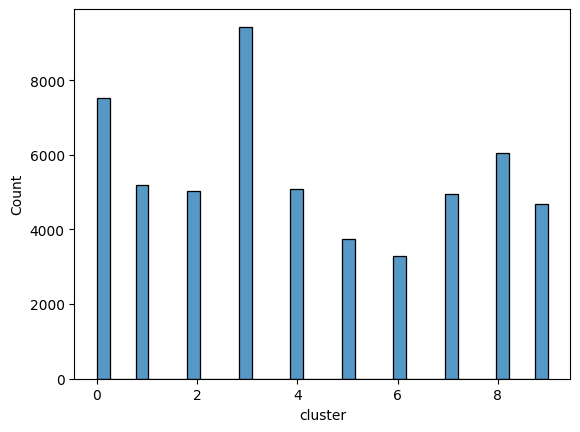

In [ ]:
sns.histplot(temp['cluster'])
plt.show()


### Exp 2 - 7day Cluster


cluster analysis of the last 7 entries of each user

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans


last_7_entries = temp.groupby('user_id').tail(7)

# encode categorical variables if needed
label_encoder = LabelEncoder()
for column in last_7_entries.select_dtypes(include=['object']).columns:
    last_7_entries[column] = label_encoder.fit_transform(last_7_entries[column])

# normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(last_7_entries.drop(['user_id'], axis=1))

kmeans = KMeans(n_clusters=10)  # change k
last_7_entries['cluster'] = kmeans.fit_predict(scaled_data)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=last_7_entries.columns[:-1])  # Exclude the 'cluster' column
cluster_centers_df['cluster'] = range(len(cluster_centers_df))

print(cluster_centers_df)


    user_id    gender  question_1  question_2  question_3  question_4  \
0  2.019727  1.693475    5.283763   17.491654    6.895296    1.418816   
1  0.001420  1.335227   22.761364   13.515625    7.639205    1.218750   
2  2.012715  0.061331   13.007479   14.784592    8.741960    1.599850   
3  1.761442  0.144244   14.782247   15.352288    1.102635    2.190014   
4  1.193059  0.780911   14.453362   15.898048    6.052061    3.101952   
5  1.247831  0.147460   13.892193   15.630731    6.061958    8.495663   
6  2.016591  1.641026   18.472097    3.503771    6.892911    1.273002   
7  2.015322  1.680286   23.932584   19.751788    7.099081    1.101124   
8  1.533019  1.745283   19.185535   14.542453    6.213836    8.465409   
9  0.004896  0.832313    7.188494   14.320685    7.378213    1.139535   

     question_5  daily_activity  cluster  
0    899.028832    8.995448e+00        0  
1   1586.538352    4.021307e+00        1  
2   1018.881077    3.000000e+00        2  
3   1156.084605    1.000

### Exp 3 - Scores

In [ ]:
# calculate user's wellbeing score
# Scoring system:
# from the last 7 entries of the user:
# okay: 0
# not okay: -1
# good: +1
# if 2 or more  not okay: -1
# if 4 or more not okay: -2
# if 5 or more good: +1
# okay entries do not affect the score


# we could maybe also use the average of the last 7 days of number of steps to further influence this score

In [ ]:
def calculate_wellbeing_score(answer):
    not_okay_count = (answer['question_1'] == 'Not okay').sum()
    good_count = (answer['question_1'] == 'Good').sum()

    score = 0
    if not_okay_count >= 2:
        score -= 2
    if not_okay_count >= 4:
        score -= 1  #
    if good_count >= 5:
        score += 1

    return score

In [ ]:
last_7_entries = df.groupby('user_id').tail(7)

# Calculate wellbeing score for each user
q1_scores = last_7_entries.groupby('user_id').apply(calculate_wellbeing_score)
print(q1_scores.value_counts())

 0    430
-2    295
 1    253
-3    119
-1     15
Name: count, dtype: int64


### Physical Activity w/O null

In [ ]:
# include also activity score in wellbeing?

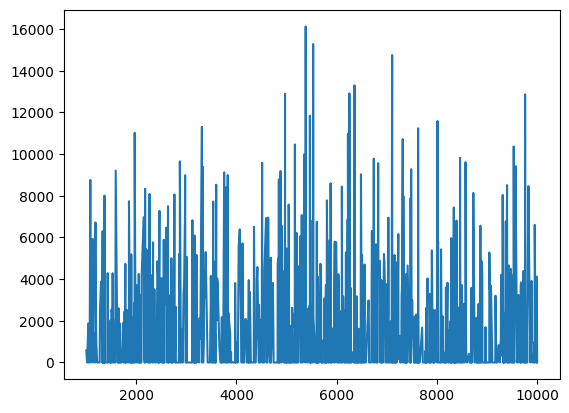

In [ ]:
avg7_DA=(last_7_entries.groupby('user_id').tail()).groupby('user_id')['daily_activity'].mean()
avg7_DA.describe()
plt.plot(avg7_DA)
plt.show()

In [ ]:
(avg7_DA==0).sum()
(avg7_DA==0).sum()/len(avg7_DA)

0.5386690647482014

In [ ]:
del_idx = avg7_DA[avg7_DA == 0].index
DA7 = avg7_DA.drop(del_idx)

In [ ]:
DA7.describe()

count      513.000000
mean      3648.232359
std       2773.632405
min         19.600000
25%       1672.000000
50%       2876.600000
75%       4831.800000
max      16128.000000
Name: daily_activity, dtype: float64

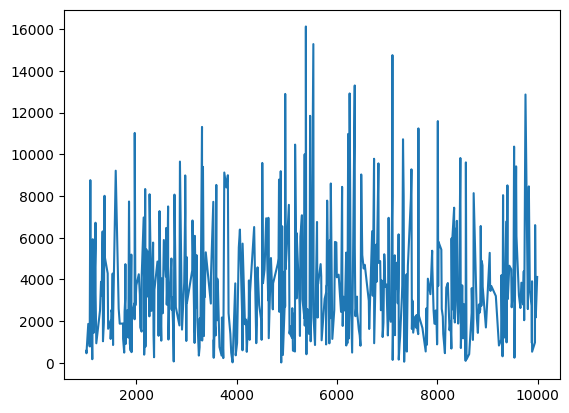

In [ ]:
plt.plot(DA7)
plt.show()

#### Consistent Users

In [ ]:
def consistent_users(df):
    return [userID for userID in df['user_id'].unique() if check_consecutive(df[df['user_id'] == userID]['Date'])]


def check_consecutive(dates):
    series =  pd.Series(pd.Series(pd.to_datetime(dates)).unique())  # Convert to datetime and create Series

    # Sort the series to make sure it is in order
    series = series.sort_values()

    # Calculate the differences between consecutive dates
    differences = series.diff()

    # Check if there are six consecutive differences of one day each
    has_seven_consecutive_days = (differences == pd.Timedelta(days=1)).rolling(window=6).sum() == 6

    # Check if any such sequence exists
    result = has_seven_consecutive_days.any()
    return result

## Ideas

- check distribution of answers per question. Group many low-frequency anserws into one other-category. So we reduce the number of dimensions of the df

- create a physical score and a emotional score, the combination of both should create an overall score

- group emotions into categorizes (maybe like positive, negative, neutral? Not sure)



Scoring system:

- Create a score system for each question
- Bag different emotions/ actions into categories
- Find a way to use the scores plus the activity data to create a profile

## Notes

Not sure how to handle the missing values from Q3-Q5
- I have filled them with "NA" (as a string)
- but maybe there are better ways to handle these missing values.

In [ ]:
def seven_entries(df):
  user_counts = df.groupby('user_id').count()
  idx7 = user_counts[user_counts['question_1'] >= 7].index
  df7 = df[df['user_id'].isin(idx7)]
  df7 = df7.groupby('user_id').tail(7)
  return df7

temp = df[['user_id', 'question_1', 'question_5','total_steps' ]]
df7 = seven_entries(temp)
weekly_stats = (pd.get_dummies(df7)).groupby('user_id').sum()

KeyError: "['total_steps'] not in index"

In [ ]:
from sklearn.manifold import TSNE
def create_tsne_plot(df):
    """
    Creates a T-SNE plot based on responses to question 1.

    Args:
        df (pd.DataFrame): Input dataframe containing relevant columns.

    Returns:
        None (displays the plot)
    """
    # Extract the responses to question 1
    y_values = df['question_1']

    # Initialize T-SNE with 2 target dimensions
    tsne = TSNE(n_components=2, verbose=1, random_state=123)

    # Fit and transform the data
    z = tsne.fit_transform(df.drop(columns=['question_1']))

    # Create a dataframe for visualization
    df_tsne = pd.DataFrame()
    df_tsne['y'] = y_values
    df_tsne['comp-1'] = z[:, 0]
    df_tsne['comp-2'] = z[:, 1]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='comp-1', y='comp-2', hue=df_tsne['y'].tolist(), palette=sns.color_palette('hls', 3))
    plt.title('T-SNE Projection of Responses to Question 1')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Question 1', loc='upper right')
    plt.show()

# Example usage:
create_tsne_plot(df)  # Replace 'df' with your actual dataframe

ValueError: could not convert string to float: 'she'